In [1]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import pandas as pd

In [2]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
print(train_x[0])
print(train_y[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D

In [6]:
model = Sequential()

In [7]:
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28, 28, 1)))

# Adding maxpooling layer to get max value within a matrix
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1384576   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1386506 (5.29 MB)
Trainable params: 1386506 (5.29 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [8]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [9]:
model.fit(train_x.astype(np.float32), train_y.astype(np.float32), epochs = 25, validation_split = 0.2)

Epoch 1/25
1500/1500 [==============================] - 63s 40ms/step - loss: 1.3001 - accuracy: 0.8455 - val_loss: 0.3418 - val_accuracy: 0.8794
Epoch 2/25
1500/1500 [==============================] - 48s 32ms/step - loss: 0.2896 - accuracy: 0.8974 - val_loss: 0.3158 - val_accuracy: 0.8891
Epoch 3/25
1500/1500 [==============================] - 49s 33ms/step - loss: 0.2445 - accuracy: 0.9106 - val_loss: 0.3009 - val_accuracy: 0.8953
Epoch 4/25
1500/1500 [==============================] - 48s 32ms/step - loss: 0.2197 - accuracy: 0.9191 - val_loss: 0.3459 - val_accuracy: 0.8903
Epoch 5/25
1500/1500 [==============================] - 51s 34ms/step - loss: 0.2029 - accuracy: 0.9251 - val_loss: 0.3459 - val_accuracy: 0.8900
Epoch 6/25
1500/1500 [==============================] - 49s 33ms/step - loss: 0.1829 - accuracy: 0.9313 - val_loss: 0.3578 - val_accuracy: 0.8917
Epoch 7/25
1500/1500 [==============================] - 48s 32ms/step - loss: 0.1599 - accuracy: 0.9420 - val_loss: 0.3944 -

In [10]:
loss, acc = model.evaluate(test_x, test_y)
print("Loss: ",loss)
print("Accuracy: ",acc)

313/313 [==============================] - 3s 10ms/step - loss: 1.3747 - accuracy: 0.8889
Loss:  1.374729037284851
Accuracy:  0.8888999819755554


In [11]:
labels = ['t_shirt','trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker','bag', 'ankle_boots']

In [12]:
value = test_x[:11][10]
value_reshape = value.reshape(1, 28, 28, 1)

In [13]:
predictions = model.predict([value_reshape])

1/1 [==============================] - 0s 111ms/step


In [14]:
label = labels[np.argmax(predictions)]
print("Actual Value: ",labels[test_y[:11][10]])
print("Predicted Value: ",label)

Actual Value:  coat
Predicted Value:  coat


<function matplotlib.pyplot.show(close=None, block=None)>

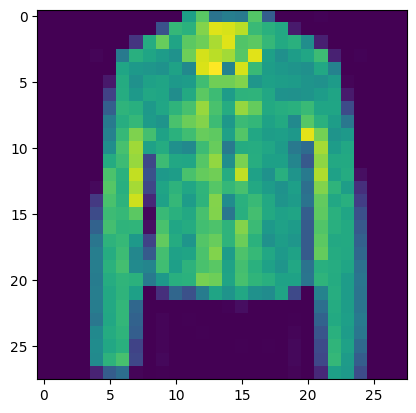

In [16]:
import matplotlib.pyplot as plt
plt.imshow(value)
plt.show